In [1]:
%matplotlib inline
#implementamos un algoritmo de regresion
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline


In [2]:
data=pd.read_csv(r'C:\Users\JOHAN\Desktop\articulos_ml.csv',parse_dates=True)

In [3]:
data.head()

,Title,url,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
0,What is Machine Learning and how do we use it ...,https://blog.signals.network/what-is-machine-l...,1888,1,2.0,2,34,200000
1,10 Companies Using Machine Learning in Cool Ways,NaN,1742,9,NaN,9,5,25000
2,How Artificial Intelligence Is Revolutionizing...,NaN,962,6,0.0,1,10,42000
3,Dbrain and the Blockchain of Artificial Intell...,NaN,1221,3,NaN,2,68,200000
4,Nasa finds entire solar system filled with eig...,NaN,2039,1,104.0,4,131,200000


In [4]:
#fase de analisis de datos
data.describe()

,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
count,161.000000,161.000000,129.000000,161.000000,161.000000,161.000000
mean,1808.260870,9.739130,8.782946,3.670807,98.124224,27948.347826
std,1141.919385,47.271625,13.142822,3.418290,114.337535,43408.006839
min,250.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,990.000000,3.000000,2.000000,1.000000,31.000000,2800.000000
50%,1674.000000,5.000000,6.000000,3.000000,62.000000,16458.000000
75%,2369.000000,7.000000,12.000000,5.000000,124.000000,35691.000000
max,8401.000000,600.000000,104.000000,22.000000,1002.000000,350000.000000


In [5]:
corr=data.corr( method='pearson')

<AxesSubplot:>

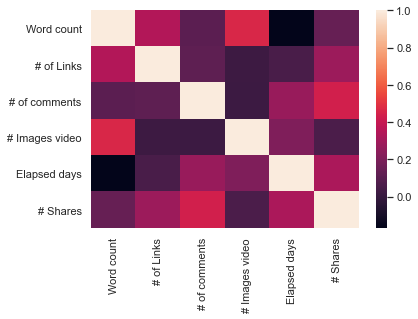

In [6]:
sns.heatmap(corr)

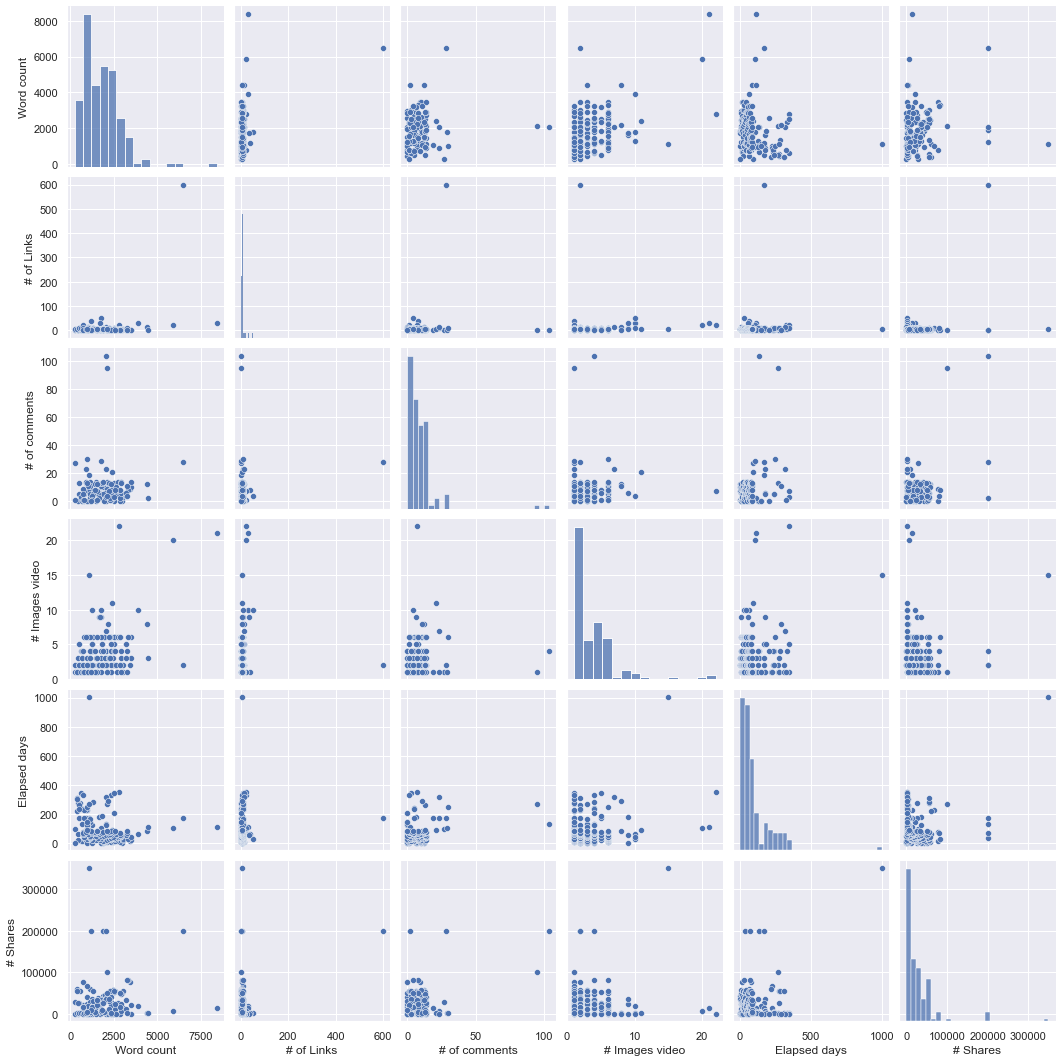

In [7]:
sns.pairplot(data)

In [8]:
#luego realizamos un procesamiento de datos
from sklearn.preprocessing import StandardScaler



In [9]:
#como el problema es de regression en este caso separamos las variables continuas
data_filter=data[['Word count','# of Links','# of comments','# Images video','Elapsed days','# Shares']]

In [10]:
data_filter.head()

,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
0,1888,1,2.0,2,34,200000
1,1742,9,NaN,9,5,25000
2,962,6,0.0,1,10,42000
3,1221,3,NaN,2,68,200000
4,2039,1,104.0,4,131,200000


In [11]:
#verificamos la presencia de datos faltantes
data_filter.isnull().sum(axis=0)

Word count         0
# of Links         0
# of comments     32
# Images video     0
Elapsed days       0
# Shares           0
dtype: int64

In [12]:
data_filter['# of comments'].fillna(data_filter['# of comments'].mode()[0],inplace=True)

C:\Users\JOHAN\anaconda3\envs\mlearning\lib\site-packages\pandas\core\series.py:4439: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


<AxesSubplot:>

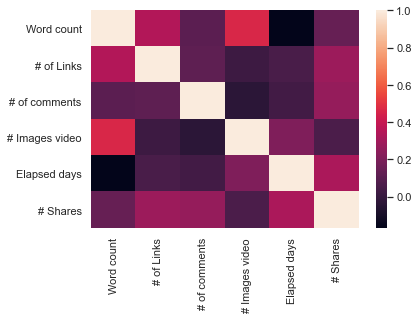

In [13]:
sns.heatmap(data_filter.corr())

In [14]:
#verificamos que ls variables estan correlacionadas para agregarlas al modelo
X=data_filter.drop('# Shares',axis=1).values
y=data_filter['# Shares'].values

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42,shuffle=True)

In [16]:
#escalamos los datos
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)
#escogemos un modelo de regresion. Maquinas de soporte vectorial


## Implementacion basica del Algoritmo

In [17]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,r2_score

In [18]:
model=SVR(kernel='rbf')
model.fit(x_train,y_train)

y_pred=model.predict(x_test)
print("Puntaje Error cuadratico medio:",mean_squared_error(y_test,y_pred))
print("Puntaje R2:",r2_score(y_test,y_pred))

Puntaje Error cuadratico medio: 441541448.12987715
Puntaje R2: -0.03261119182945138


## Implementacion avanzada

* Validacion cruzada del modelo
* Ajuste de hiperparametros
* Equilibrio entre Sobreajuste y subajuste

In [50]:
#ahora probamos el ajuste del modelo con cada pliegue del conjunto de datos train
from sklearn.model_selection import GridSearchCV,KFold
from sklearn.pipeline import Pipeline

model=SVR() #creacion del modelo
kf=KFold(n_splits=20,random_state=42,shuffle=True) #validacion cruzada
model=Pipeline([
    ('scaler',StandardScaler()),
    ('svr',SVR())
]) #creacion de la tuberia de datos
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42,shuffle=True) #volvemos dividir los datos
#construimos el optimizador
grid=GridSearchCV(model,param_grid={
                    "svr__gamma":np.arange(0.0001,1,0.001),
                    "svr__C":10**np.arange(0,4)
                },
                    cv=kf,
                    n_jobs=-1,
                    return_train_score=True,
                  verbose=5,
                  scoring='neg_mean_squared_error'
)



In [51]:
grid.fit(x_train,y_train)

Fitting 20 folds for each of 4000 candidates, totalling 80000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 1552 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 3568 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 6160 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 9328 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Done 13072 tasks      | elapsed:   14.2s
[Parallel(n_jobs=-1)]: Done 17392 tasks      | elapsed:   18.6s
[Parallel(n_jobs=-1)]: Done 22288 tasks      | elapsed:   23.9s
[Parallel(n_jobs=-1)]: Done 27760 tasks      | elapsed:   29.7s
[Parallel(n_jobs=-1)]: Done 33808 tasks      | elapsed:   36.1s
[Parallel(n_jobs=-1)]: Done 40432 tasks      | elapsed:   43.3s
[Parallel(n_jobs=-1)]: Done 47632 tasks      | elapsed:   51.5s
[Parallel(n_jobs=-1)]: Done 55408 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 63760 ta

GridSearchCV(cv=KFold(n_splits=20, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svr', SVR())]),
             n_jobs=-1,
             param_grid={'svr__C': array([   1,   10,  100, 1000], dtype=int32),
                         'svr__gamma': array([1.000e-04, 1.100e-03, 2.100e-03, 3.100e-03, 4.100e-03, 5.100e-03,
       6.100e-03, 7.100e-03, 8.100e-03, 9.100e-03, 1.010e-02, 1.110e-02,
       1.210e-02,...
       9.721e-01, 9.731e-01, 9.741e-01, 9.751e-01, 9.761e-01, 9.771e-01,
       9.781e-01, 9.791e-01, 9.801e-01, 9.811e-01, 9.821e-01, 9.831e-01,
       9.841e-01, 9.851e-01, 9.861e-01, 9.871e-01, 9.881e-01, 9.891e-01,
       9.901e-01, 9.911e-01, 9.921e-01, 9.931e-01, 9.941e-01, 9.951e-01,
       9.961e-01, 9.971e-01, 9.981e-01, 9.991e-01])},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=5)

In [52]:
grid.best_score_

-2795716843.0353227

In [53]:
grid.best_params_

{'svr__C': 1000, 'svr__gamma': 0.9991}

In [54]:
model=grid.best_estimator_

In [55]:
from sklearn.model_selection import cross_val_score
#Evaluamos el puntaje de entrenamiento
scor=model.score(x_train,y_train)
print("Puntaje entrenamiento Directo: ",scor)
scor=cross_val_score(model,x_train,y_train,cv=10,scoring='neg_mean_squared_error')
print("Puntaje entrenamiento Validacion cruzada: ",scor.mean())


Puntaje entrenamiento Directo:  -0.04357414411222127
Puntaje entrenamiento Validacion cruzada:  -2536729495.407639


In [56]:
#Evaluamos el puntaje en los datos de prueba
scor=model.score(x_test,y_test)
print("Puntaje prueba Directo: ",scor)
scor=cross_val_score(model,x_test,y_test,cv=10,scoring='neg_mean_squared_error')
print("Puntaje prueba con Validacion cruzada: ",scor.mean())

Puntaje prueba Directo:  -0.004464826271626476
Puntaje prueba con Validacion cruzada:  -497766626.4959427


In [57]:
import joblib
joblib.dump(model,'regresion_predecir_shares.pkl')

['regresion_predecir_shares.pkl']

In [58]:
#verificacion de eficacia del modelo
y_prueba=model.predict([x_train[0]])
print(y_prueba)
print(y_train[0])

[16376.20190368]
196


In [ ]:
pipe_model.score(x_test,y_test)

In [ ]:
data_filter.columns

In [38]:
data_filter.head(2)

,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
0,1888,1,2.0,2,34,200000
1,1742,9,0.0,9,5,25000


In [ ]:
sns.displot(data_filter['# Shares'],kde=True)

In [ ]:
y_train.min()